1. Bibliothèques importées avec succès.

2. Téléchargement et chargement des données...
Using Colab cache for faster access to the 'insurance' dataset.
   Dataset téléchargé dans : /kaggle/input/insurance

   ✓ Données chargées avec succès
   Dimensions du dataset : 1338 lignes × 7 colonnes

   Aperçu des premières lignes :
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


3. EXPLORATION INITIALE DES DONNÉES

   A. Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64

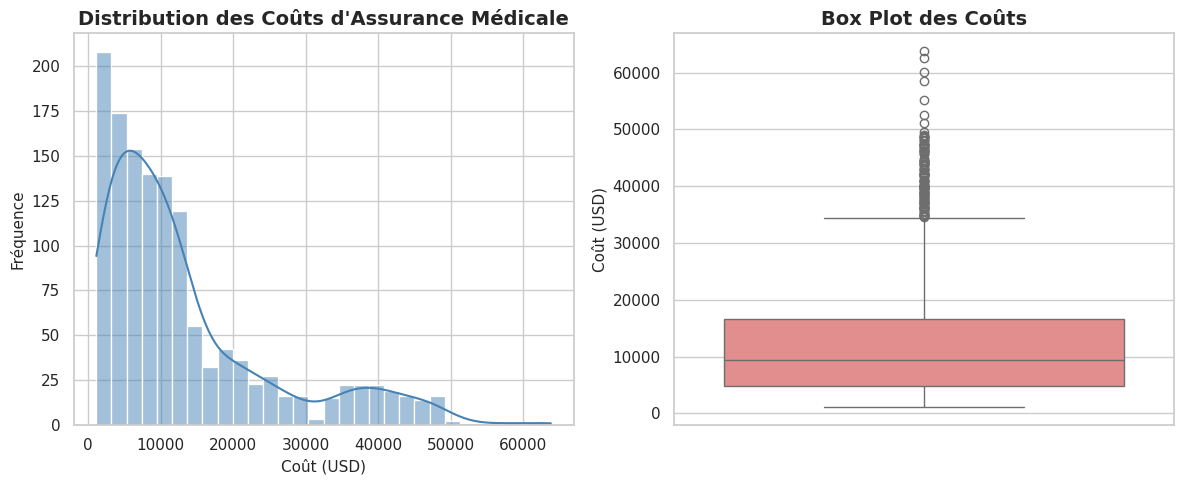

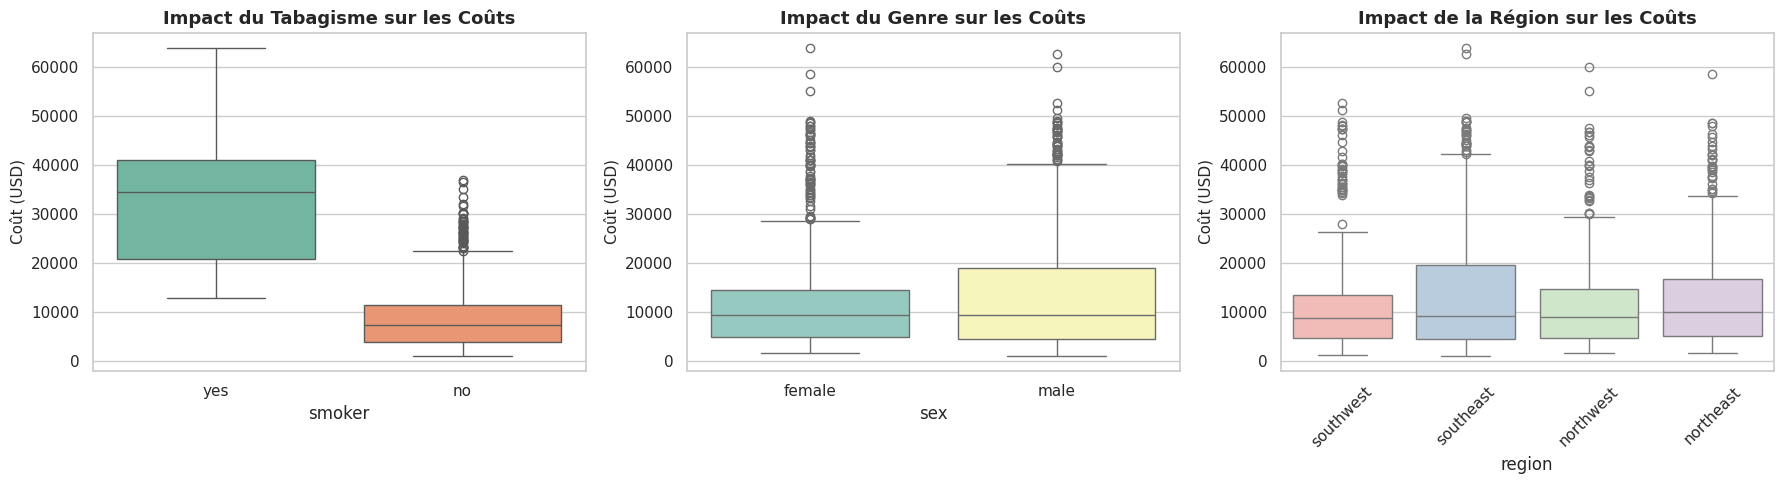

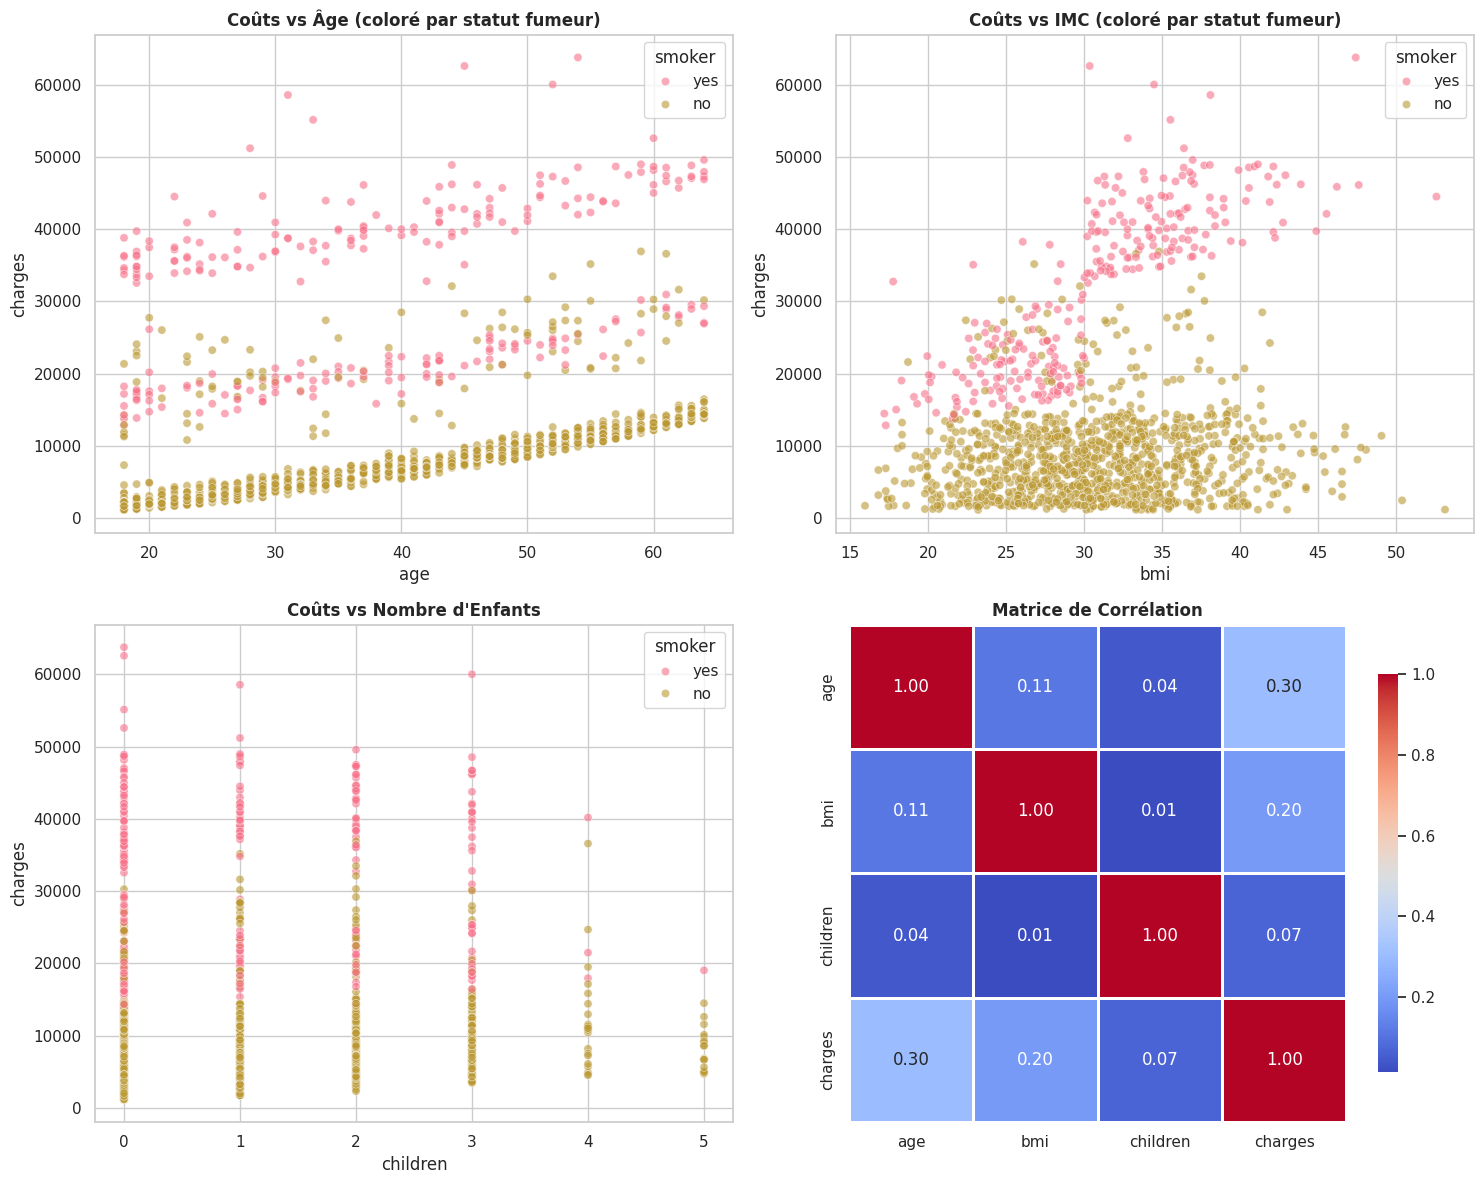

   ✓ Visualisations EDA générées avec succès

5. PRÉPARATION DES DONNÉES

   A. Encodage des variables catégorielles...
   ✓ Variables encodées
   Nouvelles colonnes créées : ['region_northwest', 'region_southeast', 'region_southwest']

   B. Séparation X et y :
   Features (X) : (1338, 8)
   Target (y) : (1338,)

6. DIVISION DES DONNÉES (Train/Test Split)

   Ensemble d'entraînement : 1070 échantillons (80.0%)
   Ensemble de test : 268 échantillons (20.0%)

7. STANDARDISATION DES FEATURES

   Application du StandardScaler...
   ✓ Standardisation complétée
   (Moyenne = 0, Écart-type = 1 pour chaque feature)

8. ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LINÉAIRE

   Initialisation et entraînement du modèle...
   ✓ Modèle entraîné avec succès !

   COEFFICIENTS DU MODÈLE (Impact de chaque variable) :
   ------------------------------------------------------------
         Feature  Coefficient
          smoker  9558.481409
             age  3614.975415
             bmi  2036.228123
        ch

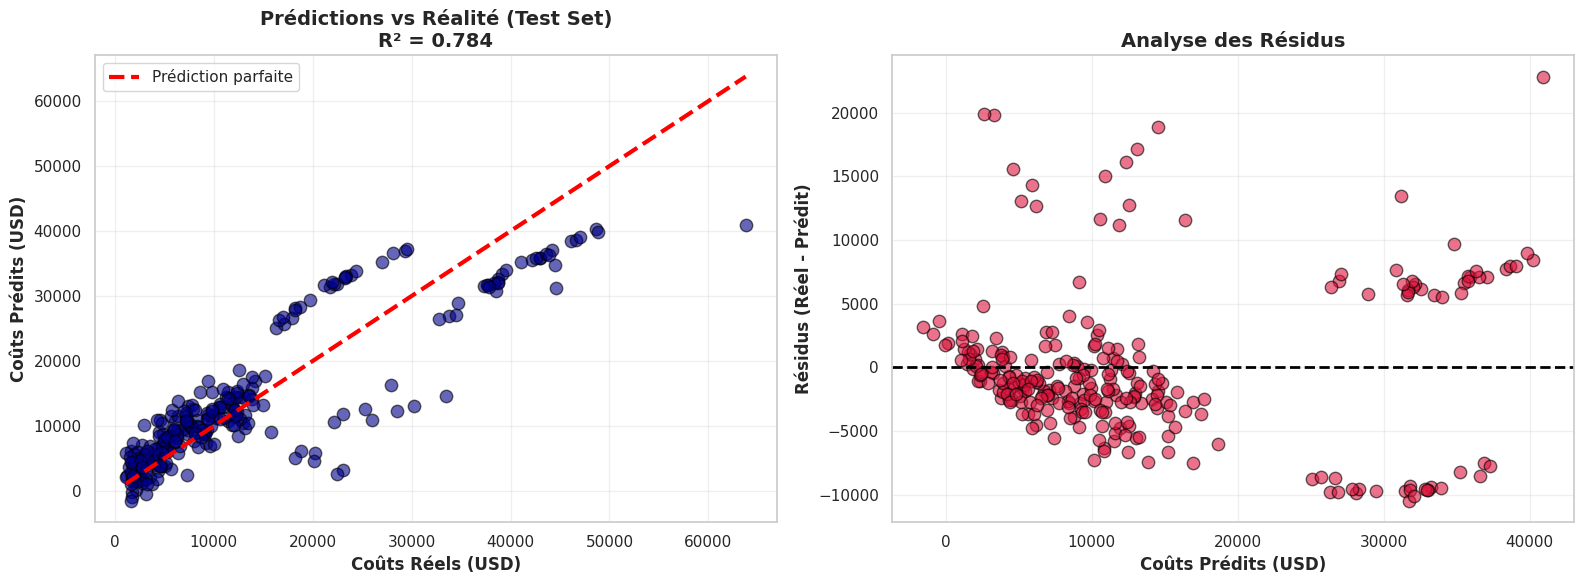

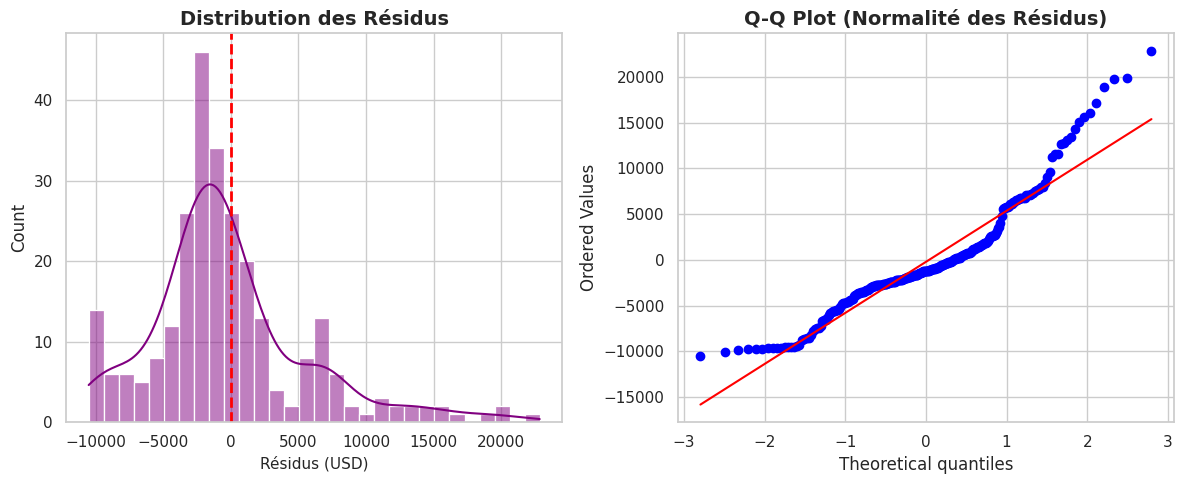


11. EXEMPLE DE PRÉDICTION

   PROFIL DU PATIENT :
   ------------------------------------------------------------
   Âge : 35 ans
   Sexe : Homme
   IMC : 27.5
   Nombre d'enfants : 2
   Fumeur : Non
   Région : Southwest

   💰 COÛT D'ASSURANCE PRÉDIT : $6,355.14 / an

12. CONCLUSION DU PROJET

   RÉSUMÉ DES RÉSULTATS :
   ------------------------------------------------------------
   ✓ R² Score : 0.784 - Le modèle explique 78.4% de la variance
   ✓ RMSE : $5,796.28
   ✓ MAE : $4,181.19

   INSIGHTS CLÉS :
   ------------------------------------------------------------
   Les 3 facteurs ayant le plus d'impact sur les coûts :
   • smoker : +9,558.48
   • age : +3,614.98
   • bmi : +2,036.23

   ✓ Le statut de fumeur est généralement le facteur le plus impactant
   ✓ L'âge et l'IMC contribuent également significativement aux coûts

FIN DU PROJET - Modèle de Régression Linéaire entraîné avec succès !


In [1]:
# ==============================================================================
# PROJET DATA SCIENCE : PRÉDICTION DES COÛTS D'ASSURANCE MÉDICALE
# Dataset : Medical Insurance Cost Dataset
# Algorithme : Régression Linéaire Multiple
# ==============================================================================

# ------------------------------------------------------------------------------
# CONTEXTE DU PROJET
# ------------------------------------------------------------------------------
# Ce projet analyse les facteurs influençant les coûts d'assurance médicale.
# Le dataset contient des informations sur des assurés (âge, IMC, nombre d'enfants,
# statut fumeur, région) et leurs frais médicaux annuels.
#
# OBJECTIF : Prédire les coûts d'assurance médicale en fonction des caractéristiques
# personnelles des assurés.
#
# ALGORITHME CHOISI : Régression Linéaire Multiple
# POURQUOI ?
# - Variable cible continue (coût en dollars)
# - Relations potentiellement linéaires entre features et coût
# - Interprétabilité élevée (coefficients = impact de chaque variable)
# - Baseline solide pour comparer avec des modèles plus complexes
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn pour la régression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuration esthétique
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("1. Bibliothèques importées avec succès.")
print("=" * 80 + "\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
print("2. Téléchargement et chargement des données...")

# Installation de kagglehub si nécessaire
try:
    import kagglehub
except:
    print("   Installation de kagglehub...")
    !pip install kagglehub -q
    import kagglehub

# Téléchargement du dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")
print(f"   Dataset téléchargé dans : {path}")

# Chargement du fichier CSV
import os
csv_file = os.path.join(path, "insurance.csv")
df = pd.read_csv(csv_file)

print(f"\n   ✓ Données chargées avec succès")
print(f"   Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n   Aperçu des premières lignes :")
print(df.head())
print("\n")

# ------------------------------------------------------------------------------
# 3. EXPLORATION INITIALE DES DONNÉES
# ------------------------------------------------------------------------------
print("=" * 80)
print("3. EXPLORATION INITIALE DES DONNÉES")
print("=" * 80)

# Structure du dataset
print("\n   A. Informations générales :")
print(df.info())

print("\n   B. Statistiques descriptives :")
print(df.describe())

print("\n   C. Vérification des valeurs manquantes :")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("   ✓ Aucune valeur manquante détectée !")

print("\n   D. Distribution des variables catégorielles :")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n   {col.upper()} :")
    print(df[col].value_counts())

# ------------------------------------------------------------------------------
# 4. ANALYSE EXPLORATOIRE VISUELLE (EDA)
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("4. ANALYSE EXPLORATOIRE VISUELLE (EDA)")
print("=" * 80 + "\n")

# A. Distribution de la variable cible (charges)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='charges', kde=True, color='steelblue', bins=30)
plt.title('Distribution des Coûts d\'Assurance Médicale', fontsize=14, weight='bold')
plt.xlabel('Coût (USD)', fontsize=11)
plt.ylabel('Fréquence', fontsize=11)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'], color='lightcoral')
plt.title('Box Plot des Coûts', fontsize=14, weight='bold')
plt.ylabel('Coût (USD)', fontsize=11)

plt.tight_layout()
plt.show()

# B. Impact des variables catégorielles sur les coûts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0], palette='Set2')
axes[0].set_title('Impact du Tabagisme sur les Coûts', fontsize=13, weight='bold')
axes[0].set_ylabel('Coût (USD)', fontsize=11)

sns.boxplot(data=df, x='sex', y='charges', ax=axes[1], palette='Set3')
axes[1].set_title('Impact du Genre sur les Coûts', fontsize=13, weight='bold')
axes[1].set_ylabel('Coût (USD)', fontsize=11)

sns.boxplot(data=df, x='region', y='charges', ax=axes[2], palette='Pastel1')
axes[2].set_title('Impact de la Région sur les Coûts', fontsize=13, weight='bold')
axes[2].set_ylabel('Coût (USD)', fontsize=11)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# C. Relations entre variables numériques et coûts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.scatterplot(data=df, x='age', y='charges', hue='smoker', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title('Coûts vs Âge (coloré par statut fumeur)', fontsize=12, weight='bold')

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Coûts vs IMC (coloré par statut fumeur)', fontsize=12, weight='bold')

sns.scatterplot(data=df, x='children', y='charges', hue='smoker', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Coûts vs Nombre d\'Enfants', fontsize=12, weight='bold')

# Matrice de corrélation des variables numériques
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1],
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
axes[1, 1].set_title('Matrice de Corrélation', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

print("   ✓ Visualisations EDA générées avec succès\n")

# ------------------------------------------------------------------------------
# 5. PRÉPARATION DES DONNÉES (Feature Engineering)
# ------------------------------------------------------------------------------
print("=" * 80)
print("5. PRÉPARATION DES DONNÉES")
print("=" * 80 + "\n")

# Copie du dataframe pour la préparation
df_processed = df.copy()

# A. Encodage des variables catégorielles
print("   A. Encodage des variables catégorielles...")

# Encodage binaire pour 'sex' et 'smoker'
df_processed['sex'] = df_processed['sex'].map({'male': 1, 'female': 0})
df_processed['smoker'] = df_processed['smoker'].map({'yes': 1, 'no': 0})

# One-Hot Encoding pour 'region'
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

print(f"   ✓ Variables encodées")
print(f"   Nouvelles colonnes créées : {[col for col in df_processed.columns if 'region_' in col]}")

# B. Séparation Features (X) et Target (y)
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

print(f"\n   B. Séparation X et y :")
print(f"   Features (X) : {X.shape}")
print(f"   Target (y) : {y.shape}")

# ------------------------------------------------------------------------------
# 6. DIVISION TRAIN/TEST
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("6. DIVISION DES DONNÉES (Train/Test Split)")
print("=" * 80)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n   Ensemble d'entraînement : {X_train.shape[0]} échantillons ({(X_train.shape[0]/len(df)*100):.1f}%)")
print(f"   Ensemble de test : {X_test.shape[0]} échantillons ({(X_test.shape[0]/len(df)*100):.1f}%)")

# ------------------------------------------------------------------------------
# 7. STANDARDISATION DES FEATURES
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("7. STANDARDISATION DES FEATURES")
print("=" * 80)

print("\n   Application du StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("   ✓ Standardisation complétée")
print("   (Moyenne = 0, Écart-type = 1 pour chaque feature)")

# ------------------------------------------------------------------------------
# 8. MODÉLISATION : RÉGRESSION LINÉAIRE MULTIPLE
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("8. ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LINÉAIRE")
print("=" * 80)

print("\n   Initialisation et entraînement du modèle...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("   ✓ Modèle entraîné avec succès !")

# Affichage des coefficients
print("\n   COEFFICIENTS DU MODÈLE (Impact de chaque variable) :")
print("   " + "-" * 60)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients.to_string(index=False))
print(f"\n   Intercept (ordonnée à l'origine) : {model.intercept_:.2f} USD")

# ------------------------------------------------------------------------------
# 9. PRÉDICTIONS ET ÉVALUATION
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("9. ÉVALUATION DES PERFORMANCES DU MODÈLE")
print("=" * 80)

# Prédictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Métriques de performance
print("\n   MÉTRIQUES DE PERFORMANCE :")
print("   " + "-" * 60)

# R² Score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"   R² Score (Train) : {r2_train:.4f} ({r2_train*100:.2f}% de variance expliquée)")
print(f"   R² Score (Test)  : {r2_test:.4f} ({r2_test*100:.2f}% de variance expliquée)")

# RMSE (Root Mean Squared Error)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"\n   RMSE (Train) : ${rmse_train:,.2f}")
print(f"   RMSE (Test)  : ${rmse_test:,.2f}")

# MAE (Mean Absolute Error)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"\n   MAE (Train) : ${mae_train:,.2f}")
print(f"   MAE (Test)  : ${mae_test:,.2f}")

# Interprétation
print("\n   INTERPRÉTATION :")
print("   " + "-" * 60)
if r2_test > 0.75:
    print("   ✓ Excellent : Le modèle explique plus de 75% de la variance")
elif r2_test > 0.5:
    print("   ✓ Bon : Le modèle explique plus de 50% de la variance")
else:
    print("   ⚠ Modéré : Le modèle pourrait être amélioré")

print(f"   En moyenne, le modèle se trompe de ±${mae_test:,.2f} sur les prédictions")

# ------------------------------------------------------------------------------
# 10. VISUALISATIONS DES RÉSULTATS
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("10. VISUALISATIONS DES RÉSULTATS")
print("=" * 80 + "\n")

# A. Valeurs réelles vs Prédictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sur l'ensemble de test
axes[0].scatter(y_test, y_test_pred, alpha=0.6, color='darkblue', edgecolors='k', s=80)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=3, label='Prédiction parfaite')
axes[0].set_xlabel('Coûts Réels (USD)', fontsize=12, weight='bold')
axes[0].set_ylabel('Coûts Prédits (USD)', fontsize=12, weight='bold')
axes[0].set_title(f'Prédictions vs Réalité (Test Set)\nR² = {r2_test:.3f}',
                  fontsize=14, weight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Distribution des résidus
residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.6, color='crimson', edgecolors='k', s=80)
axes[1].axhline(y=0, color='black', linestyle='--', lw=2)
axes[1].set_xlabel('Coûts Prédits (USD)', fontsize=12, weight='bold')
axes[1].set_ylabel('Résidus (Réel - Prédit)', fontsize=12, weight='bold')
axes[1].set_title('Analyse des Résidus', fontsize=14, weight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# B. Distribution des résidus
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.axvline(x=0, color='red', linestyle='--', lw=2)
plt.title('Distribution des Résidus', fontsize=14, weight='bold')
plt.xlabel('Résidus (USD)', fontsize=11)

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normalité des Résidus)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------------
# 11. EXEMPLE DE PRÉDICTION SUR DE NOUVELLES DONNÉES
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("11. EXEMPLE DE PRÉDICTION")
print("=" * 80 + "\n")

# Exemple : Prédire le coût pour un nouvel assuré
exemple_patient = pd.DataFrame({
    'age': [35],
    'sex': [1],  # 1 = homme
    'bmi': [27.5],
    'children': [2],
    'smoker': [0],  # 0 = non-fumeur
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [1]
})

# Standardisation
exemple_scaled = scaler.transform(exemple_patient)

# Prédiction
cout_predit = model.predict(exemple_scaled)[0]

print("   PROFIL DU PATIENT :")
print("   " + "-" * 60)
print(f"   Âge : 35 ans")
print(f"   Sexe : Homme")
print(f"   IMC : 27.5")
print(f"   Nombre d'enfants : 2")
print(f"   Fumeur : Non")
print(f"   Région : Southwest")
print("\n   " + "=" * 60)
print(f"   💰 COÛT D'ASSURANCE PRÉDIT : ${cout_predit:,.2f} / an")
print("   " + "=" * 60)

# ------------------------------------------------------------------------------
# 12. CONCLUSION
# ------------------------------------------------------------------------------
print("\n" + "=" * 80)
print("12. CONCLUSION DU PROJET")
print("=" * 80 + "\n")

print("   RÉSUMÉ DES RÉSULTATS :")
print("   " + "-" * 60)
print(f"   ✓ R² Score : {r2_test:.3f} - Le modèle explique {r2_test*100:.1f}% de la variance")
print(f"   ✓ RMSE : ${rmse_test:,.2f}")
print(f"   ✓ MAE : ${mae_test:,.2f}")
print("\n   INSIGHTS CLÉS :")
print("   " + "-" * 60)

top_3_features = coefficients.head(3)
print("   Les 3 facteurs ayant le plus d'impact sur les coûts :")
for idx, row in top_3_features.iterrows():
    print(f"   • {row['Feature']} : {row['Coefficient']:+,.2f}")

print("\n   ✓ Le statut de fumeur est généralement le facteur le plus impactant")
print("   ✓ L'âge et l'IMC contribuent également significativement aux coûts")
print("\n" + "=" * 80)
print("FIN DU PROJET - Modèle de Régression Linéaire entraîné avec succès !")
print("=" * 80)